# Credit Scoring CNN Modelling Version 0.1 (11/17)

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/processed/processed.csv')
df

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,3,12,7.509249,3.0,4.0,3.0,0,5.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
4,576,5,3,12,7.509249,3.0,4.0,3.0,0,6.0,...,2,28.460148,24.797347,1,1,49.574949,21.465380,1,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9254,4,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,34.663572,1,1,35.104023,24.028477,0,479.866228,0
99996,9254,5,3,9,8.119522,4.0,6.0,7.0,0,18.0,...,2,22.413835,40.565631,1,1,35.104023,24.028477,1,496.651610,0
99997,9254,6,3,9,8.119522,4.0,6.0,7.0,0,27.0,...,2,22.413835,41.255522,1,1,35.104023,24.028477,0,516.809083,0
99998,9254,7,3,9,8.119522,4.0,6.0,7.0,0,20.0,...,2,22.413835,33.638208,1,1,35.104023,24.028477,3,319.164979,1


## DL

### CNN

In [5]:
df_dl = df.copy()

In [6]:
for col in df_dl.iloc[:, :-1].columns[df_dl.iloc[:, :-1].dtypes != 'float']:
    df_dl[col] = df_dl[col].astype(np.float64)

In [7]:
df_dl.dtypes

Customer_ID                 float64
Month                       float64
Age                         float64
Occupation                  float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [8]:
df_dl.select_dtypes('int')

,Credit_Score
0,2
1,2
2,2
3,2
4,2
...,...
99995,0
99996,0
99997,0
99998,1


In [9]:
train_df = df_dl[df_dl['Month'] <= 6]
test_df = df_dl[df_dl['Month'] > 6]

print(train_df.shape)
print(test_df.shape)

(75000, 23)
(25000, 23)


In [10]:
train_df

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576.0,1.0,3.0,12.0,7.509249,3.0,4.0,3.0,0.0,3.0,...,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089,2
1,576.0,2.0,3.0,12.0,7.509249,3.0,4.0,3.0,0.0,3.0,...,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162,2
2,576.0,3.0,3.0,12.0,7.509249,3.0,4.0,3.0,0.0,3.0,...,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863,2
3,576.0,4.0,3.0,12.0,7.509249,3.0,4.0,3.0,0.0,5.0,...,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310,2
4,576.0,5.0,3.0,12.0,7.509249,3.0,4.0,3.0,0.0,6.0,...,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,9254.0,2.0,3.0,9.0,8.119522,4.0,6.0,7.0,0.0,23.0,...,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466,1
99994,9254.0,3.0,3.0,9.0,8.119522,4.0,6.0,7.0,0.0,20.0,...,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158,0
99995,9254.0,4.0,3.0,9.0,8.119522,4.0,6.0,7.0,0.0,23.0,...,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228,0
99996,9254.0,5.0,3.0,9.0,8.119522,4.0,6.0,7.0,0.0,18.0,...,2.0,22.413835,40.565631,1.0,1.0,35.104023,24.028477,1.0,496.651610,0


In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
scaling_cols = ['Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                'Amount_invested_monthly', 'Monthly_Balance']
rs = RobustScaler()

rs_train_df = train_df[scaling_cols].copy()
rs_test_df = test_df[scaling_cols].copy()

rs_train_df = rs.fit_transform(rs_train_df)
rs_test_df = rs.transform(rs_test_df)

train_df[scaling_cols] = rs_train_df
test_df[scaling_cols] = rs_test_df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_37647/4124677545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[scaling_cols] = rs_train_df
/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_37647/4124677545.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[scaling_cols] = rs_test_df


In [13]:
train_df[scaling_cols]

,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.407299,-0.279953,-0.648697,-0.139504,-0.546677,-0.108344
1,-0.407299,-0.279953,-0.041010,-0.139504,-0.546677,-0.250764
2,-0.407299,-0.279953,-0.436728,-0.139504,-0.546677,-0.012686
3,-0.407299,-0.279953,-0.108287,-0.139504,-0.546677,-0.563450
4,-0.407299,-0.279953,-0.888964,-0.139504,-0.546677,0.039852
...,...,...,...,...,...,...
99993,0.062676,-0.577496,-0.374315,-0.264438,-0.487533,0.339440
99994,0.062676,-0.577496,0.834349,-0.264438,-0.487533,0.391326
99995,0.062676,-0.577496,0.281512,-0.264438,-0.487533,0.747110
99996,0.062676,-0.577496,0.981701,-0.264438,-0.487533,0.832901


In [14]:
test_df[scaling_cols]

,Monthly_Inhand_Salary,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
6,-0.407299,-0.279953,-1.157050,-0.139504,-0.546677,-0.455534
7,-0.407299,-0.279953,-0.991412,-0.139504,-0.546677,0.124875
14,-0.014775,-0.470044,-0.137490,-0.405058,-0.126279,0.670517
15,-0.014775,-0.470044,0.076308,-0.405058,-0.126279,0.114418
22,1.055051,0.095873,0.685469,1.564883,2.844176,3.244844
...,...,...,...,...,...,...
99983,0.000043,-0.454528,0.831670,0.159480,-0.051250,0.505320
99990,-0.364191,1.260517,-0.850267,-0.041171,-0.242142,-0.536366
99991,-0.364191,1.260517,0.575395,-0.041171,-0.242142,0.018763
99998,0.062676,-0.577496,0.159868,-0.264438,-0.487533,-0.074249


In [15]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(75000, 22)
(75000,)
(25000, 22)
(25000,)


In [16]:
X_train

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,576.0,1.0,3.0,12.0,-0.407299,3.0,4.0,3.0,0.0,3.0,...,4.0,2.0,-0.279953,-0.648697,1.0,1.0,-0.139504,-0.546677,2.0,-0.108344
1,576.0,2.0,3.0,12.0,-0.407299,3.0,4.0,3.0,0.0,3.0,...,4.0,2.0,-0.279953,-0.041010,1.0,1.0,-0.139504,-0.546677,3.0,-0.250764
2,576.0,3.0,3.0,12.0,-0.407299,3.0,4.0,3.0,0.0,3.0,...,4.0,2.0,-0.279953,-0.436728,1.0,1.0,-0.139504,-0.546677,4.0,-0.012686
3,576.0,4.0,3.0,12.0,-0.407299,3.0,4.0,3.0,0.0,5.0,...,4.0,2.0,-0.279953,-0.108287,1.0,1.0,-0.139504,-0.546677,5.0,-0.563450
4,576.0,5.0,3.0,12.0,-0.407299,3.0,4.0,3.0,0.0,6.0,...,4.0,2.0,-0.279953,-0.888964,1.0,1.0,-0.139504,-0.546677,1.0,0.039852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,9254.0,2.0,3.0,9.0,0.062676,4.0,6.0,7.0,0.0,23.0,...,3.0,2.0,-0.577496,-0.374315,1.0,1.0,-0.264438,-0.487533,4.0,0.339440
99994,9254.0,3.0,3.0,9.0,0.062676,4.0,6.0,7.0,0.0,20.0,...,3.0,2.0,-0.577496,0.834349,1.0,1.0,-0.264438,-0.487533,1.0,0.391326
99995,9254.0,4.0,3.0,9.0,0.062676,4.0,6.0,7.0,0.0,23.0,...,3.0,2.0,-0.577496,0.281512,1.0,1.0,-0.264438,-0.487533,0.0,0.747110
99996,9254.0,5.0,3.0,9.0,0.062676,4.0,6.0,7.0,0.0,18.0,...,3.0,2.0,-0.577496,0.981701,1.0,1.0,-0.264438,-0.487533,1.0,0.832901


In [17]:
sample_size = X_train.shape[0]
num_features = X_train.shape[1]
input_dim = 1 # each feature is represented by 1 number

print('Before Reshaping... :')
print(X_train.shape)
print(X_test.shape)
print('\n')

X_train_reshape = np.reshape(X_train.values, newshape=(sample_size, num_features, input_dim))
X_test_reshape = np.reshape(X_test.values, newshape=(X_test.shape[0], num_features, input_dim))

print('After Reshaping... : ')
print(X_train_reshape.shape)
print(X_test_reshape.shape)

Before Reshaping... :
(75000, 22)
(25000, 22)


After Reshaping... : 
(75000, 22, 1)
(25000, 22, 1)


In [18]:
print("1 Sample shape:\n", X_train_reshape[0].shape)
print("An example sample:\n", X_train_reshape[0])

1 Sample shape:
 (22, 1)
An example sample:
 [[ 5.76000000e+02]
 [ 1.00000000e+00]
 [ 3.00000000e+00]
 [ 1.20000000e+01]
 [-4.07299344e-01]
 [ 3.00000000e+00]
 [ 4.00000000e+00]
 [ 3.00000000e+00]
 [ 0.00000000e+00]
 [ 3.00000000e+00]
 [ 7.00000000e+00]
 [ 0.00000000e+00]
 [ 4.00000000e+00]
 [ 2.00000000e+00]
 [-2.79952950e-01]
 [-6.48696889e-01]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-1.39504383e-01]
 [-5.46676997e-01]
 [ 2.00000000e+00]
 [-1.08344298e-01]]


In [19]:
np.savez_compressed('./train_reshape_CNN', x=X_train_reshape, y=y_train)
np.savez_compressed('./test_reshape_CNN', x=X_test_reshape, y=y_test)
train_data = np.load('./train_reshape_CNN.npz')
train_data['x']

array([[[ 5.76000000e+02],
        [ 1.00000000e+00],
        [ 3.00000000e+00],
        ...,
        [-5.46676997e-01],
        [ 2.00000000e+00],
        [-1.08344298e-01]],

       [[ 5.76000000e+02],
        [ 2.00000000e+00],
        [ 3.00000000e+00],
        ...,
        [-5.46676997e-01],
        [ 3.00000000e+00],
        [-2.50764416e-01]],

       [[ 5.76000000e+02],
        [ 3.00000000e+00],
        [ 3.00000000e+00],
        ...,
        [-5.46676997e-01],
        [ 4.00000000e+00],
        [-1.26863108e-02]],

       ...,

       [[ 9.25400000e+03],
        [ 4.00000000e+00],
        [ 3.00000000e+00],
        ...,
        [-4.87533177e-01],
        [ 0.00000000e+00],
        [ 7.47109601e-01]],

       [[ 9.25400000e+03],
        [ 5.00000000e+00],
        [ 3.00000000e+00],
        ...,
        [-4.87533177e-01],
        [ 1.00000000e+00],
        [ 8.32901184e-01]],

       [[ 9.25400000e+03],
        [ 6.00000000e+00],
        [ 3.00000000e+00],
        ...,
        

In [20]:
train_data.close()

In [21]:
train_data = np.load('./train_reshape_CNN.npz')  # 구글 드라이브에 마운트해서 쓰십쇼.!! 경로 npz 올려두었습니다.
X_train_reshape = train_data['x']
y_train = train_data['y']

print(X_train_reshape.shape)
print(y_train.shape)

train_data.close()
test_data = np.load('./test_reshape_CNN.npz')
X_test_reshape = test_data['x']
y_test = test_data['y']

print(X_test_reshape.shape)
print(y_test.shape)

test_data.close()

(75000, 22, 1)
(75000,)
(25000, 22, 1)
(25000,)


In [22]:
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import itertools # 중첩리스트 제거용

In [23]:
weights = compute_class_weight(class_weight = "balanced" ,
                               classes=np.unique(y_train),
                               y = y_train)

weights

array([1.14773666, 0.62167404, 1.92248539])

동일 weight 확인

In [24]:
i = 0
for idx, label_weight in enumerate(weights):
    if idx == i:
        print(pd.Series(y_train).value_counts()[i] * label_weight)
    i += 1

24999.999999999996
25000.0
25000.0


In [25]:
weight_dict = {k : v for k, v in enumerate(weights)}
weight_dict

{0: 1.1477366632999724, 1: 0.6216740438653205, 2: 1.9224853891110427}

In [26]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [29]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [30]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [31]:
from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [32]:
import os

In [35]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

Metal device set to: Apple M1 Pro


2022-12-24 19:14:18.325576: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-24 19:14:18.325615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8844646400397932230
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 16846705338541051427
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

In [36]:
num_classes = 3

In [37]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(num_features, input_dim)))
model.add(Conv1D(256, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=4, activation='relu'))

model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=8, activation='relu'))
# model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

Random seed set as 42


2022-12-24 19:14:24.068104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-24 19:14:24.068158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 256)           768       
                                                                 
 dropout (Dropout)           (None, 21, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 256)           262400    
                                                                 
 dropout_1 (Dropout)         (None, 18, 256)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 256)           524544    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 256)           0         
 )                                                               
                                                        

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('weighted_cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [41]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, class_weight=weight_dict, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-12-24 19:15:21.888828: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x299cb71c0
2022-12-24 19:15:21.888855: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x299cb71c0
2022-12-24 19:15:21.889230: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x299cb71c0
2022-12-24 19:15:21.889244: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x299cb71c0
2022-12-24 19:15:21.889868: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x299cb71c0
2022-12-24 19:15:21.890014: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed a

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_8' defined at (most recent call last):
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 530, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_37647/2942902343.py", line 4, in <module>
      history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, class_weight=weight_dict, callbacks=[es, mc] )
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/ben/miniforge3/envs/tf_trans/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_8'
could not find registered platform with id: 0x299cb71c0
	 [[{{node StatefulPartitionedCall_8}}]] [Op:__inference_train_function_1914]

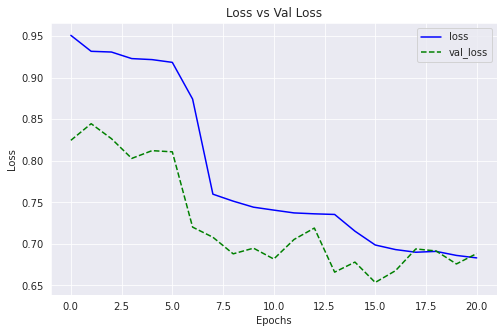

In [131]:
plot_loss(history)

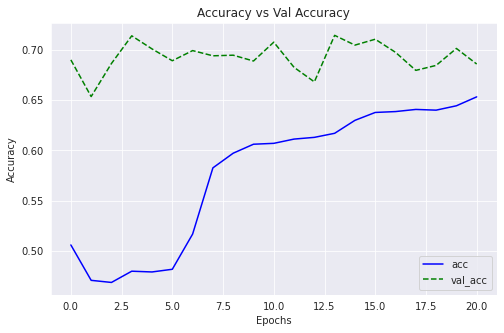

In [132]:
plot_acc(history)

In [133]:
best_model = load_model('./weighted_cnn_best_model.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

 15/782 [..............................] - ETA: 5s - loss: 0.8479 - acc: 0.6125

2022-11-18 16:54:08.841588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 5s 6ms/step - loss: 0.8732 - acc: 0.6092
Test Accuracy: 0.6091600656509399


(128일 때, 62.86%)

In [134]:
print("Train Accuracy: {}".format(best_model.evaluate(X_train_reshape, y_train)[1]))

2344/2344 [==============================] - 17s 7ms/step - loss: 0.6737 - acc: 0.7083
Train Accuracy: 0.7082666754722595


 46/782 [>.............................] - ETA: 2s

2022-11-18 17:06:55.768455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0     0.6735    0.5643    0.6141      7216
           1     0.7105    0.5708    0.6330     12960
           2     0.4401    0.7792    0.5625      4824

    accuracy                         0.6092     25000
   macro avg     0.6080    0.6381    0.6032     25000
weighted avg     0.6476    0.6092    0.6140     25000



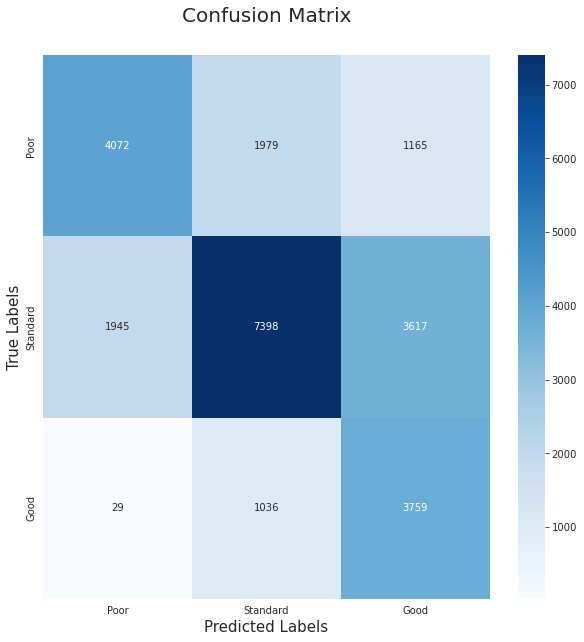

In [135]:
clf_report_plot(y_test, X_test_reshape, best_model)

# Validation 직접 설정 (Validation: 6월달 데이터)

### CNN

In [39]:
train_df = df_dl[df_dl['Month'] <= 5]
val_df = df_dl[df_dl['Month'] == 6]
test_df = df_dl[df_dl['Month'] > 6]

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(62500, 22)
(12500, 22)
(25000, 22)


In [40]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089,2
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162,2
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863,2
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310,2
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,9254.0,1.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,2.0,22.413835,32.991333,1.0,1.0,35.104023,24.028477,5.0,189.641080,0
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466,1
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158,0
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228,0


In [41]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_val, y_val = val_df.iloc[:, :-1], val_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(62500, 21)
(62500,)
(12500, 21)
(12500,)
(25000, 21)
(25000,)


In [42]:
X_train

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,4.0,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,4.0,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,4.0,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,9254.0,1.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,3.0,2.0,22.413835,32.991333,1.0,1.0,35.104023,24.028477,5.0,189.641080
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,3.0,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,3.0,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,3.0,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228


In [44]:
val_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,576.0,6.0,1.0,7.509249,3.0,4.0,3.0,0.0,8.0,4.0,...,2.0,28.460148,27.262259,1.0,1.0,49.574949,21.465380,1.0,340.479212,2
13,1822.0,6.0,1.0,8.018950,2.0,4.0,6.0,0.0,3.0,0.0,...,2.0,24.597358,33.381010,1.0,1.0,18.816215,39.684018,0.0,481.505262,2
21,2641.0,6.0,1.0,9.408143,1.0,5.0,8.0,0.0,8.0,6.0,...,2.0,36.097230,39.783993,1.0,1.0,246.992319,168.413703,1.0,963.921581,2
29,11587.0,6.0,2.0,7.868059,2.0,5.0,4.0,0.0,5.0,6.0,...,2.0,25.148757,27.445422,1.0,1.0,16.415452,29.393311,2.0,419.880784,1
37,1533.0,6.0,1.0,7.956235,7.0,5.0,5.0,0.0,5.0,15.0,...,1.0,30.722305,29.217556,1.0,2.0,0.000000,37.643638,1.0,497.687279,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,3229.0,6.0,0.0,8.151424,0.0,4.0,6.0,0.0,14.0,0.0,...,2.0,32.855441,35.549456,1.0,1.0,34.975457,31.193919,3.0,394.500158,2
99973,696.0,6.0,1.0,7.331734,1.0,1.0,5.0,0.0,1.0,0.0,...,2.0,29.952629,24.972853,1.0,1.0,41.113561,40.893052,5.0,233.301539,2
99981,10985.0,6.0,2.0,8.038192,1.0,4.0,5.0,0.0,5.0,12.0,...,2.0,24.912647,37.753013,1.0,0.0,84.205949,42.935566,5.0,368.154976,2
99989,8346.0,6.0,1.0,7.565227,10.0,8.0,29.0,1.0,33.0,25.0,...,0.0,59.763701,33.359987,0.0,2.0,60.964772,34.662906,5.0,307.659291,1


In [45]:
scaling_cols = ['Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                'Amount_invested_monthly', 'Monthly_Balance']
rs = RobustScaler()

rs_train_df = train_df[scaling_cols].copy()
rs_val_df = val_df[scaling_cols].copy()
rs_test_df = test_df[scaling_cols].copy()

rs_train_df = rs.fit_transform(rs_train_df)
rs_val_df = rs.fit_transform(rs_val_df)
rs_test_df = rs.transform(rs_test_df)

train_df[scaling_cols] = rs_train_df
val_df[scaling_cols] = rs_val_df
test_df[scaling_cols] = rs_test_df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_83207/1095217032.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[scaling_cols] = rs_train_df
/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_83207/1095217032.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[scaling_cols] = rs_val_df
/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_83207/1095217032.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [46]:
sample_size = X_train.shape[0]
num_features = X_train.shape[1]
input_dim = 1 # each feature is represented by 1 number

print('Before Reshaping... :')
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print('\n')

X_train_reshape = np.reshape(X_train.values, newshape=(sample_size, num_features, input_dim))
X_val_reshape = np.reshape(X_val.values, newshape=(X_val.shape[0], num_features, input_dim))
X_test_reshape = np.reshape(X_test.values, newshape=(X_test.shape[0], num_features, input_dim))

print('After Reshaping... : ')
print(X_train_reshape.shape)
print(X_val_reshape.shape)
print(X_test_reshape.shape)

Before Reshaping... :
(62500, 21)
(12500, 21)
(25000, 21)


After Reshaping... : 
(62500, 21, 1)
(12500, 21, 1)
(25000, 21, 1)


In [66]:
print("1 Sample shape:\n", X_train_reshape[0].shape)
print("An example sample:\n", X_train_reshape[0])

1 Sample shape:
 (21, 1)
An example sample:
 [[576.        ]
 [  1.        ]
 [  1.        ]
 [  7.50924942]
 [  3.        ]
 [  4.        ]
 [  3.        ]
 [  0.        ]
 [  3.        ]
 [  7.        ]
 [  0.        ]
 [  4.        ]
 [  2.        ]
 [ 28.46014758]
 [ 26.82261962]
 [  1.        ]
 [  1.        ]
 [ 49.57494921]
 [ 21.46538026]
 [  2.        ]
 [312.49408868]]


In [69]:
np.savez_compressed('./train_reshape_CNN', x=X_train_reshape, y=y_train)
np.savez_compressed('./val_reshape_CNN', x=X_val_reshape, y=y_val)
np.savez_compressed('./test_reshape_CNN', x=X_test_reshape, y=y_test)

In [70]:
train_data = np.load('./train_reshape_CNN.npz')

In [79]:
train_data['x']

array([[[5.76000000e+02],
        [1.00000000e+00],
        [1.00000000e+00],
        ...,
        [2.14653803e+01],
        [2.00000000e+00],
        [3.12494089e+02]],

       [[5.76000000e+02],
        [2.00000000e+00],
        [1.00000000e+00],
        ...,
        [2.14653803e+01],
        [3.00000000e+00],
        [2.84629162e+02]],

       [[5.76000000e+02],
        [3.00000000e+00],
        [1.00000000e+00],
        ...,
        [2.14653803e+01],
        [4.00000000e+00],
        [3.31209863e+02]],

       ...,

       [[9.25400000e+03],
        [3.00000000e+00],
        [1.00000000e+00],
        ...,
        [2.40284774e+01],
        [1.00000000e+00],
        [4.10256158e+02]],

       [[9.25400000e+03],
        [4.00000000e+00],
        [1.00000000e+00],
        ...,
        [2.40284774e+01],
        [0.00000000e+00],
        [4.79866228e+02]],

       [[9.25400000e+03],
        [5.00000000e+00],
        [1.00000000e+00],
        ...,
        [2.40284774e+01],
        [1.0000

In [80]:
train_data.close()

In [48]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [51]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [52]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [53]:
from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [54]:
import os

In [55]:
num_classes = 3

In [56]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(num_features, input_dim)))
model.add(Conv1D(256, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=4, activation='relu'))

model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=8, activation='relu'))
# model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

Random seed set as 42


In [57]:
# set_seed(42)
# model = Sequential()
# model.add(Input(shape=(num_features, input_dim)))
# model.add(Conv1D(128, kernel_size=2, activation='relu'))
# # model.add(MaxPooling1D(pool_size=3, strides=1))
# model.add(Dropout(0.3))
# model.add(Conv1D(128, kernel_size=4, activation='relu'))
#
# model.add(Dropout(0.3))
# model.add(Conv1D(128, kernel_size=8, activation='relu'))
# # model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
# model.add(MaxPooling1D())
# model.add(Dropout(0.3))
#
# model.add(Flatten())
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
#
#
# model.add(Dense(num_classes, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 20, 256)           768       
                                                                 
 dropout_4 (Dropout)         (None, 20, 256)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 256)           262400    
                                                                 
 dropout_5 (Dropout)         (None, 17, 256)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 10, 256)           524544    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                      

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('cnn_best_model_scaled_2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [60]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-17 16:43:30.419448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


977/977 [==============================] - ETA: 0s - loss: 1.0130 - acc: 0.5704

2022-11-17 16:43:48.152915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.51448, saving model to cnn_best_model_scaled_2.h5
977/977 [==============================] - 20s 20ms/step - loss: 1.0130 - acc: 0.5704 - val_loss: 0.9067 - val_acc: 0.5145
Epoch 2/50
975/977 [============================>.] - ETA: 0s - loss: 0.9016 - acc: 0.5914
Epoch 2: val_acc improved from 0.51448 to 0.59112, saving model to cnn_best_model_scaled_2.h5
977/977 [==============================] - 19s 19ms/step - loss: 0.9016 - acc: 0.5914 - val_loss: 0.8790 - val_acc: 0.5911
Epoch 3/50
977/977 [==============================] - ETA: 0s - loss: 0.8897 - acc: 0.6006
Epoch 3: val_acc did not improve from 0.59112
977/977 [==============================] - 19s 19ms/step - loss: 0.8897 - acc: 0.6006 - val_loss: 0.8829 - val_acc: 0.5224
Epoch 4/50
976/977 [============================>.] - ETA: 0s - loss: 0.8786 - acc: 0.6075
Epoch 4: val_acc did not improve from 0.59112
977/977 [==============================] - 19s 19ms/step - loss: 0.8786 - acc: 0

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


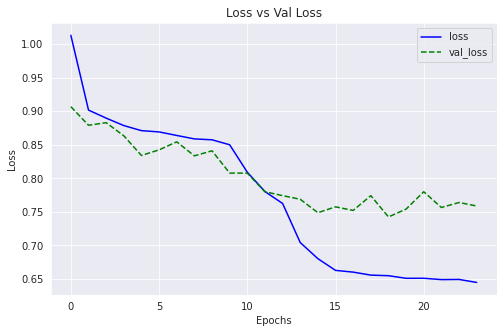

In [61]:
plot_loss(history)

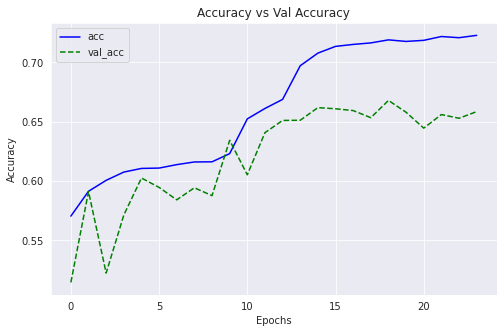

In [62]:
plot_acc(history)

In [63]:
best_model = load_model('./cnn_best_model_scaled_2.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

  7/782 [..............................] - ETA: 6s - loss: 0.7658 - acc: 0.6518  

2022-11-17 16:51:03.121374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 6s 7ms/step - loss: 0.8153 - acc: 0.6354
Test Accuracy: 0.635360062122345


In [64]:
print('Train Accuracy: {}'.format(best_model.evaluate(X_train_reshape, y_train)[1]))

1954/1954 [==============================] - 14s 7ms/step - loss: 0.6092 - acc: 0.7284
Train Accuracy: 0.7284479737281799


 52/782 [>.............................] - ETA: 2s

2022-11-17 16:51:22.692634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0     0.6827    0.5571    0.6136      7216
           1     0.6190    0.8074    0.7008     12960
           2     0.6343    0.2902    0.3982      4824

    accuracy                         0.6354     25000
   macro avg     0.6454    0.5516    0.5708     25000
weighted avg     0.6404    0.6354    0.6172     25000



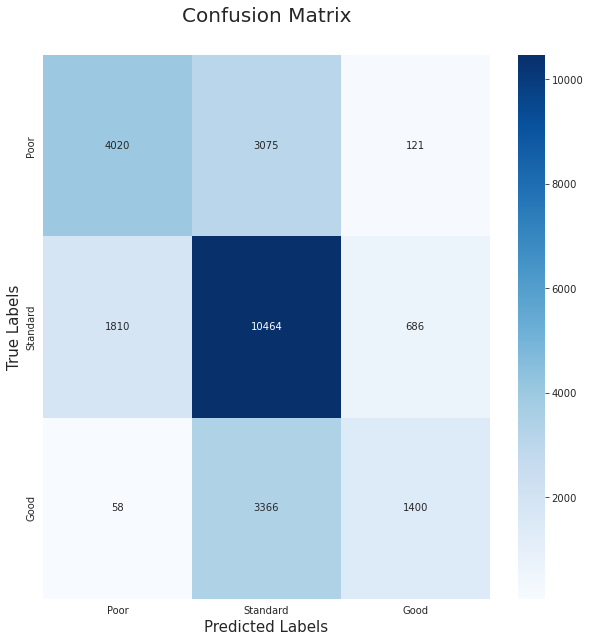

In [65]:
clf_report_plot(y_test, X_test_reshape, best_model)

## CNN 병렬모델

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Concatenate, MaxPooling1D, GlobalMaxPooling1D

In [73]:
set_seed(42) # seed 설정

# Input layer 생성
input = Input(shape=(num_features, input_dim), name='input')
print('Input shape : ', input.shape)

# CNN
cnn1 = Conv1D(128, kernel_size=2, strides=1, padding='valid', activation='relu', name='conv1')(input) # kernel_size=2: 2개씩 feature 학습
print('cnn1 shape : ', cnn1.shape)
cnn1 = BatchNormalization(name='batch1')(cnn1)
# cnn1 = MaxPooling1D(name='max1')(cnn1)
cnn1 = GlobalMaxPooling1D(name='max1')(cnn1)
cnn1 = Dense(128, activation='relu')(cnn1)
cnn1 = Dropout(0.2, name='drop1')(cnn1)
print('cnn1 shape : ', cnn1.shape)

cnn2 = Conv1D(128, kernel_size=4, strides=1, padding='valid', activation='relu', name='conv2')(input) # kernel_size=4: 4개씩 feature 학습
print('cnn2 shape : ', cnn2.shape)
cnn2 = BatchNormalization(name='batch2')(cnn2)
# cnn2 = MaxPooling1D(name='max2')(cnn2)
cnn2 = GlobalMaxPooling1D(name='max2')(cnn2)
cnn2 = Dense(128, activation='relu')(cnn2)
cnn2 = Dropout(0.2, name='drop2')(cnn2)
print('cnn2 shape : ', cnn2.shape)

cnn3 = Conv1D(128, kernel_size=6, strides=1, padding='valid', activation='relu', name='conv3')(input) # kernel_size=4: 6개씩 feature 학습
print('cnn3 shape : ', cnn3.shape)
cnn3 = BatchNormalization(name='batch3')(cnn3)
# cnn3 = MaxPooling1D(name='max3')(cnn3)
cnn3 = GlobalMaxPooling1D(name='max3')(cnn3)
cnn3 = Dense(128, activation='relu')(cnn3)
cnn3 = Dropout(0.2, name='drop3')(cnn3)
print('cnn3 shape : ', cnn3.shape)

cnn_concat = Concatenate(name='cnn_concat')([cnn1, cnn2, cnn3])
print('After Concat shape :', cnn_concat.shape)

decoder = Dense(128, activation='relu')(cnn_concat)
decoder = Dropout(0.2, name='decoder_dropout')(decoder)
decoder = Dense(64, activation='relu')(cnn_concat)
output = Dense(num_classes, activation='softmax')(decoder)
print('output: ', output.shape)

model = Model(inputs=input, outputs=output)

Random seed set as 42
Input shape :  (None, 21, 1)
cnn1 shape :  (None, 20, 128)
cnn1 shape :  (None, 128)
cnn2 shape :  (None, 18, 128)
cnn2 shape :  (None, 128)
cnn3 shape :  (None, 16, 128)
cnn3 shape :  (None, 128)
After Concat shape : (None, 384)
output:  (None, 3)


In [74]:
# set_seed(42) # seed 설정
#
# # Input layer 생성
# input = Input(shape=(num_features, input_dim), name='input')
# print('Input shape : ', input.shape)
#
# # CNN
# cnn1 = Conv1D(128, kernel_size=2, strides=1, padding='valid', activation='relu', name='conv1')(input) # kernel_size=2: 2개씩 feature 학습
# print('cnn1 shape : ', cnn1.shape)
# cnn1 = BatchNormalization(name='batch1')(cnn1)
# # cnn1 = MaxPooling1D(name='max1')(cnn1)
# cnn1 = GlobalMaxPooling1D(name='max1')(cnn1)
# cnn1 = Dropout(0.2, name='drop1')(cnn1)
# print('cnn1 shape : ', cnn1.shape)
#
# cnn2 = Conv1D(128, kernel_size=4, strides=1, padding='valid', activation='relu', name='conv2')(input) # kernel_size=4: 4개씩 feature 학습
# print('cnn2 shape : ', cnn2.shape)
# cnn2 = BatchNormalization(name='batch2')(cnn2)
# # cnn2 = MaxPooling1D(name='max2')(cnn2)
# cnn2 = GlobalMaxPooling1D(name='max2')(cnn2)
# cnn2 = Dropout(0.2, name='drop2')(cnn2)
# print('cnn2 shape : ', cnn2.shape)
#
# cnn3 = Conv1D(128, kernel_size=6, strides=1, padding='valid', activation='relu', name='conv3')(input) # kernel_size=4: 6개씩 feature 학습
# print('cnn3 shape : ', cnn3.shape)
# cnn3 = BatchNormalization(name='batch3')(cnn3)
# # cnn3 = MaxPooling1D(name='max3')(cnn3)
# cnn3 = GlobalMaxPooling1D(name='max3')(cnn3)
# cnn3 = Dropout(0.2, name='drop3')(cnn3)
# print('cnn3 shape : ', cnn3.shape)
#
# cnn_concat = Concatenate(name='cnn_concat')([cnn1, cnn2, cnn3])
# print('After Concat shape :', cnn_concat.shape)
#
# decoder = Dense(128, activation='relu')(cnn_concat)
# decoder = Dropout(0.2, name='decoder_dropout')(decoder)
# decoder = Dense(64, activation='relu')(cnn_concat)
# output = Dense(num_classes, activation='softmax')(decoder)
#
# print('output: ', output.shape)
# model = Model(inputs=input, outputs=output)

In [75]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 21, 1)]      0           []                               
                                                                                                  
 conv1 (Conv1D)                 (None, 20, 128)      384         ['input[0][0]']                  
                                                                                                  
 conv2 (Conv1D)                 (None, 18, 128)      640         ['input[0][0]']                  
                                                                                                  
 conv3 (Conv1D)                 (None, 16, 128)      896         ['input[0][0]']                  
                                                                                            

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('concatenated_cnn_best_model_2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [77]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-17 09:03:58.363920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


977/977 [==============================] - ETA: 0s - loss: 0.7986 - acc: 0.6319

2022-11-17 09:04:19.258796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.62264, saving model to concatenated_cnn_best_model_2.h5
977/977 [==============================] - 23s 23ms/step - loss: 0.7986 - acc: 0.6319 - val_loss: 0.8286 - val_acc: 0.6226
Epoch 2/50
976/977 [============================>.] - ETA: 0s - loss: 0.6840 - acc: 0.6864
Epoch 2: val_acc improved from 0.62264 to 0.64664, saving model to concatenated_cnn_best_model_2.h5
977/977 [==============================] - 21s 21ms/step - loss: 0.6840 - acc: 0.6864 - val_loss: 0.8048 - val_acc: 0.6466
Epoch 3/50
976/977 [============================>.] - ETA: 0s - loss: 0.6568 - acc: 0.7020
Epoch 3: val_acc improved from 0.64664 to 0.65920, saving model to concatenated_cnn_best_model_2.h5
977/977 [==============================] - 20s 21ms/step - loss: 0.6569 - acc: 0.7020 - val_loss: 0.7948 - val_acc: 0.6592
Epoch 4/50
976/977 [============================>.] - ETA: 0s - loss: 0.6443 - acc: 0.7098
Epoch 4: val_acc did not improve from 0.65920
977/977 [=====

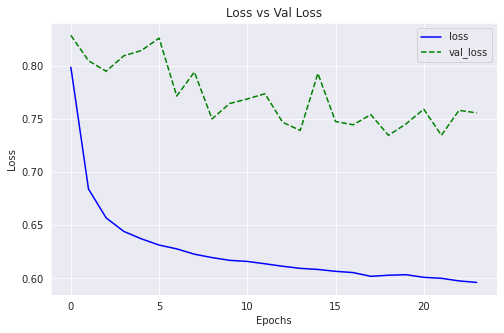

In [78]:
plot_loss(history)

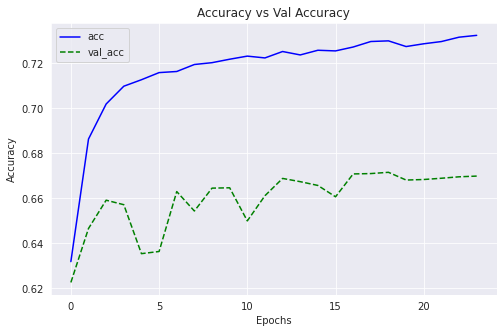

In [79]:
plot_acc(history)

In [80]:
best_model = load_model('./concatenated_cnn_best_model_2.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

  4/782 [..............................] - ETA: 13s - loss: 0.7524 - acc: 0.6328 

2022-11-17 09:12:05.529457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 6s 8ms/step - loss: 0.8204 - acc: 0.6262
Test Accuracy: 0.6261600255966187


In [82]:
print('Train Accuracy: {}'.format(best_model.evaluate(X_train_reshape, y_train)[1]))

1954/1954 [==============================] - 16s 8ms/step - loss: 0.5926 - acc: 0.7330
Train Accuracy: 0.7330080270767212


In [ ]:
clf_report_plot(y_test, X_test_reshape, best_model)

Predict Probabilities

In [84]:
result = best_model.predict(X_train_reshape)

1954/1954 [==============================] - 7s 4ms/step


In [86]:
performance_list = []
performance_list.append(result)
print(performance_list)

[array([[0.02734532, 0.29905915, 0.67359555],
       [0.02378798, 0.33618578, 0.6400262 ],
       [0.03116329, 0.30505085, 0.6637858 ],
       ...,
       [0.47341737, 0.32990038, 0.19668224],
       [0.59580123, 0.27819887, 0.12599994],
       [0.31709978, 0.3652758 , 0.3176245 ]], dtype=float32), array([[0.02734532, 0.29905915, 0.67359555],
       [0.02378798, 0.33618578, 0.6400262 ],
       [0.03116329, 0.30505085, 0.6637858 ],
       ...,
       [0.47341737, 0.32990038, 0.19668224],
       [0.59580123, 0.27819887, 0.12599994],
       [0.31709978, 0.3652758 , 0.3176245 ]], dtype=float32)]
